In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [13]:
insurance = pd.read_csv("C:\Aalesh and Mandar\Datasets\Cases\Medical Cost Personal\insurance.csv")

In [14]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
insurance = pd.get_dummies(insurance, drop_first = True)

In [16]:
insurance.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [17]:
x = insurance.drop("charges", axis=1)
y = insurance["charges"]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 2022, test_size = 0.3)

In [22]:
rfc = RandomForestRegressor()

In [23]:
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print(r2_score(y_test, y_pred))

0.8602301844466553


In [25]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 2022)
params = {"max_features": np.arange(2,8)}
gcv = GridSearchCV(rfc, param_grid = params, verbose = 3, scoring = "r2", cv = kfold)
gcv.fit(x, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....................max_features=2;, score=0.865 total time=   0.4s
[CV 2/5] END ....................max_features=2;, score=0.820 total time=   0.2s
[CV 3/5] END ....................max_features=2;, score=0.738 total time=   0.2s
[CV 4/5] END ....................max_features=2;, score=0.851 total time=   0.3s
[CV 5/5] END ....................max_features=2;, score=0.851 total time=   0.3s
[CV 1/5] END ....................max_features=3;, score=0.872 total time=   0.3s
[CV 2/5] END ....................max_features=3;, score=0.832 total time=   0.3s
[CV 3/5] END ....................max_features=3;, score=0.764 total time=   0.3s
[CV 4/5] END ....................max_features=3;, score=0.863 total time=   0.3s
[CV 5/5] END ....................max_features=3;, score=0.864 total time=   0.3s
[CV 1/5] END ....................max_features=4;, score=0.876 total time=   0.3s
[CV 2/5] END ....................max_features=4;,

GridSearchCV(cv=KFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_features': array([2, 3, 4, 5, 6, 7])},
             scoring='r2', verbose=3)

In [26]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_features': 4}
0.83923017719223


In [29]:
best_model = gcv.best_estimator_
imps = best_model.feature_importances_

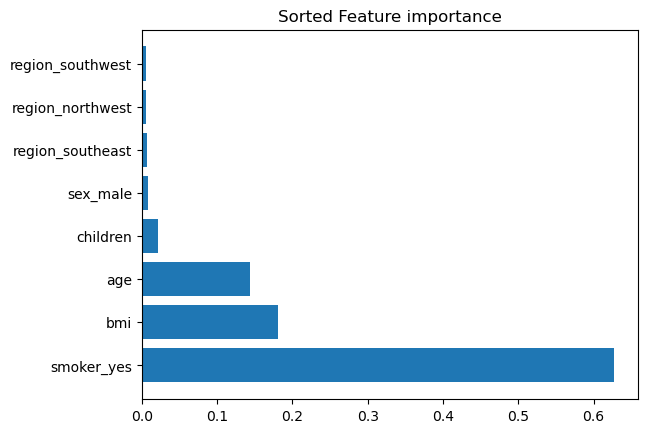

In [30]:
i_sorted = np.argsort(-imps)
n_sorted = x.columns[i_sorted]
imp_sort = imps[i_sorted]
plt.barh(n_sorted, imp_sort)
plt.title("Sorted Feature importance")
plt.show()